In [1]:
import pandas as pd
from langchain_openai import ChatOpenAI
import os
import getpass
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from pydantic import BaseModel, Field


In [2]:

df_raw = dict()
df_results = dict()

for event in ['pelosi', '96_crisis']:
    df_raw[event] = pd.read_csv(f"Data/Processed/{event}.csv")
    df_result = pd.read_csv(f"Results/{event}_20250202.csv")
    df_result = df_result.merge(df_raw[event][["id", 'date']], on="id")
    df_result = df_result.drop(columns=['Topic', 'Word_Count', 'Taiwan_Count', 'US_count']).set_index('id')

    df_result['week'] = pd.to_datetime(df_result['date']).dt.to_period('W').apply(lambda r: r.end_time.date())

    df_result = df_result.drop(columns=['date'])
    df_result = df_result.groupby('week').sum()
    df_result = df_result.apply(lambda x: x.rolling(window=4).mean())
    df_result = df_result.dropna()
    df_results[event] = df_result


df_results['96_crisis'] = df_results['96_crisis'][(df_results['96_crisis'].index >= pd.to_datetime("1994-01-01").date()) & (df_results['96_crisis'].index <= pd.to_datetime("1996-12-31").date())]

df_results['pelosi']= df_results['pelosi'][(df_results['pelosi'].index >= pd.to_datetime("2022-01-01").date()) & (df_results['pelosi'].index <= pd.to_datetime("2023-12-31").date())]

In [3]:

def add_vlines_96_crisis(plot_on=plt):
    # plot_on = plt for single plot
    # plot_on = ax for subplots
    
    plot_on.axvline(pd.to_datetime("1996-03-23").to_period('W').end_time.date(), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("1996-02").to_period('W').end_time.date(), plt.ylim()[1]*1.01, 'TW presidential election', color='r', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1995-06-10").to_period('W').end_time.date(), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("1994-12").to_period('W').end_time.date(), plt.ylim()[1]*1.01, 'Lee\'s Cornell speech', color='r', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1996-09-01").to_period('W').end_time.date(), color='blue', linestyle='--')
    plot_on.text(pd.to_datetime("1996-03").to_period('W').end_time.date(), plt.ylim()[1]*1.17, "Taiwan's proposal for representation in the UN", color='blue', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1994-09-01").to_period('W').end_time.date(), color='blue', linestyle='--')
    plot_on.text(pd.to_datetime("1994-05").to_period('W').end_time.date(), plt.ylim()[1]*1.17, "Taiwan's proposal for representation in the UN", color='blue', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("1995-05-09").to_period('W').end_time.date(), color='green', linestyle='--')
    plot_on.text(pd.to_datetime("1995-03").to_period('W').end_time.date(), plt.ylim()[1]*1.10, 'US allowed Lee\'s visit', color='green', verticalalignment='bottom')

    plot_on.axvline(pd.to_datetime("1995-01-30").to_period('W').end_time.date(), color='purple', linestyle='--')
    plot_on.text(pd.to_datetime("1995-01").to_period('W').end_time.date(), plt.ylim()[1]*1.25, "Jiang's speech", color='purple', verticalalignment='bottom')


def add_vlines_pelosi(plot_on=plt):
    # plot_on = plt for single plot
    # plot_on = ax for subplots
    
    plot_on.axvline(pd.to_datetime("2022-08-02").to_period('W').end_time.date(), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("2022-06-01").to_period('W').end_time.date(), plt.ylim()[1]*1.01, 'Pelosi visting Taiwan', color='r', verticalalignment='bottom')

    plot_on.axvline(pd.to_datetime("2023-04-05").to_period('W').end_time.date(), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("2022-12-01").to_period('W').end_time.date(), plt.ylim()[1]*1.01, 'Tsai/McCarthy meeting', color='r', verticalalignment='bottom')
    
    plot_on.axvline(pd.to_datetime("2023-08-12").to_period('W').end_time.date(), color='r', linestyle='--')
    plot_on.text(pd.to_datetime("2023-07-01").to_period('W').end_time.date(), plt.ylim()[1]*1.01, 'Lai stopped by the US', color='r', verticalalignment='bottom')
    
add_vlines = dict()
add_vlines['96_crisis'] = add_vlines_96_crisis
add_vlines['pelosi'] = add_vlines_pelosi


**************************************************
96_crisis
**************************************************


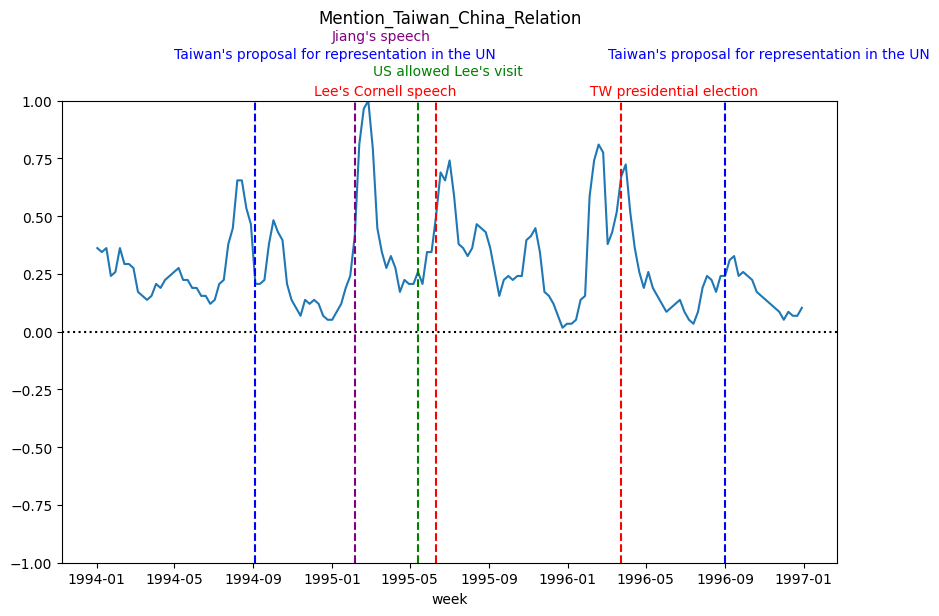

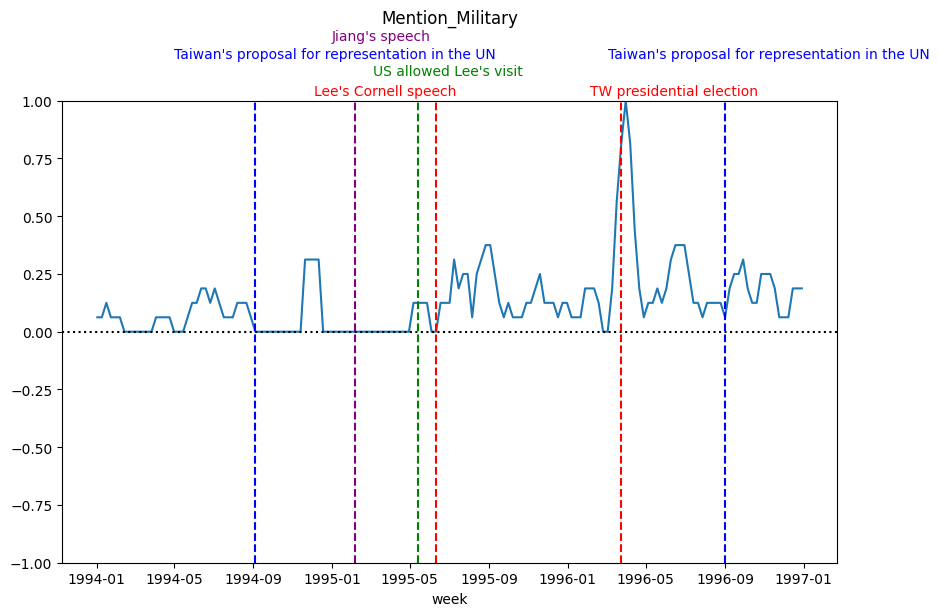

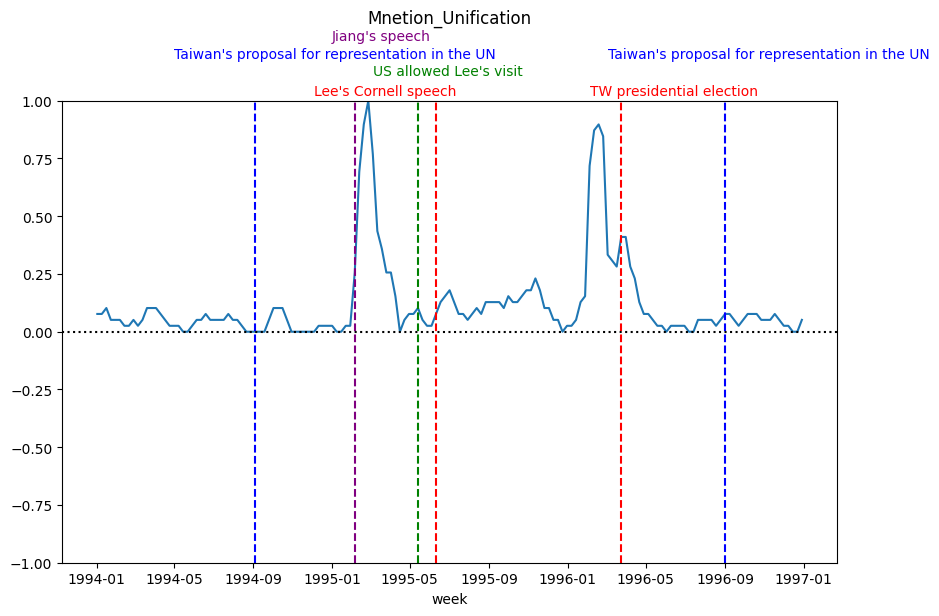

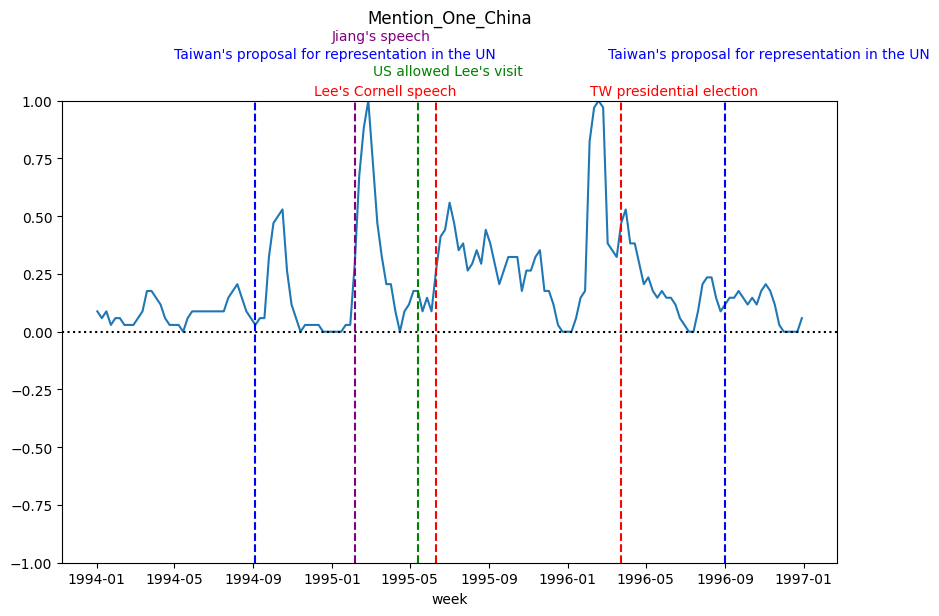

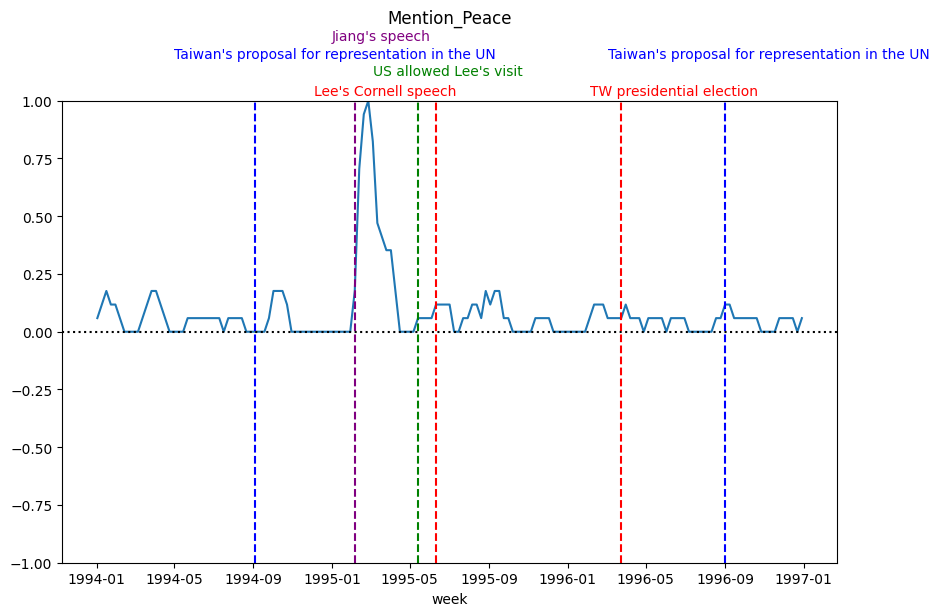

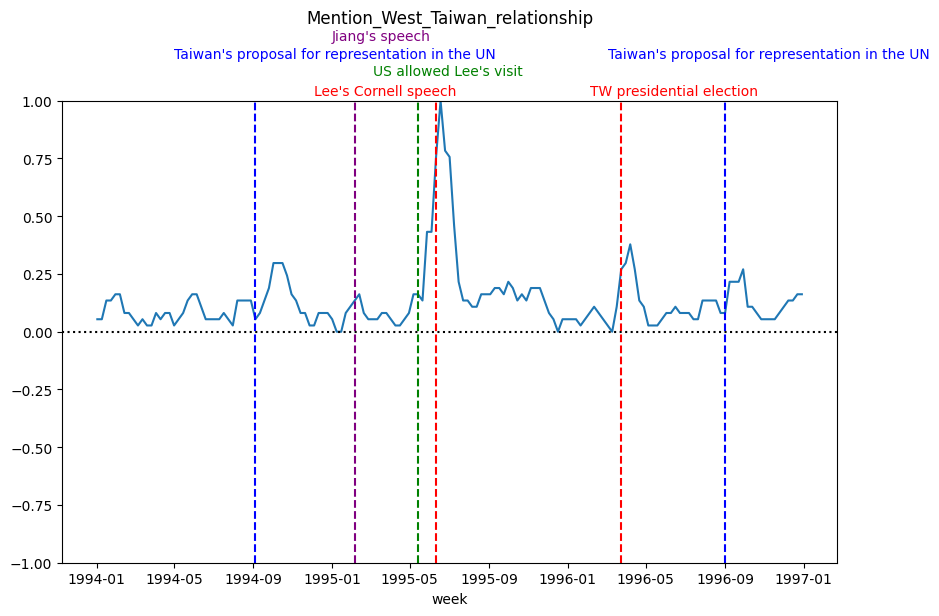

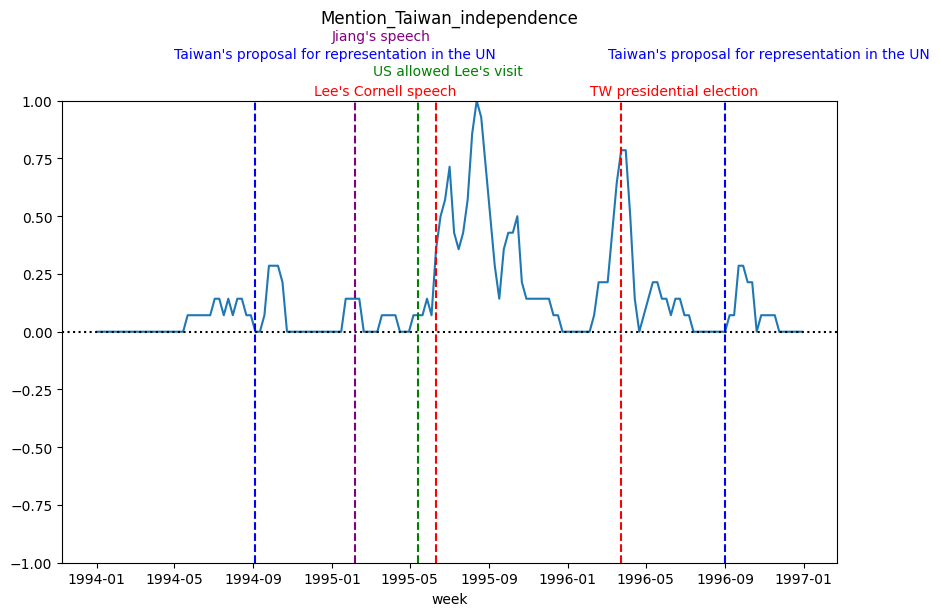

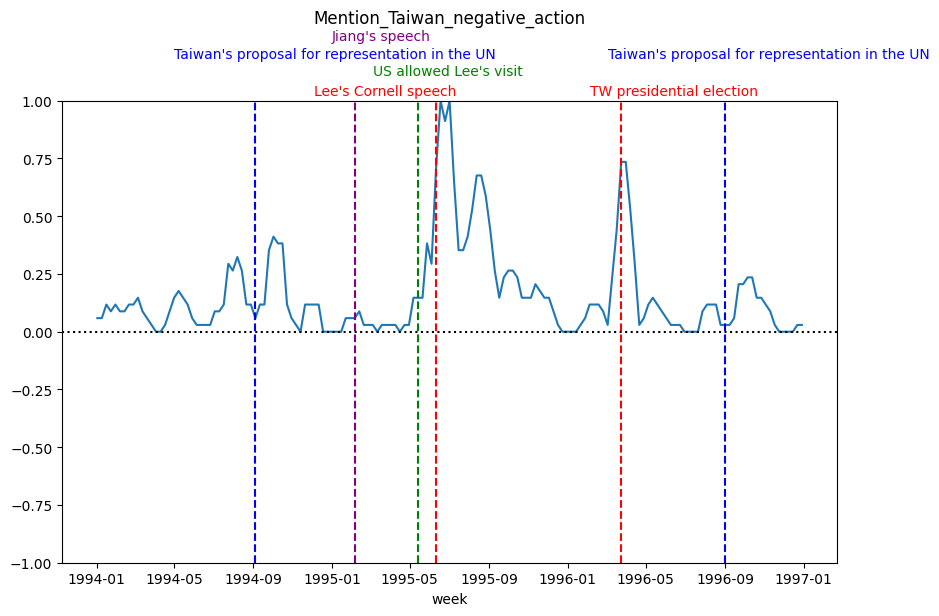

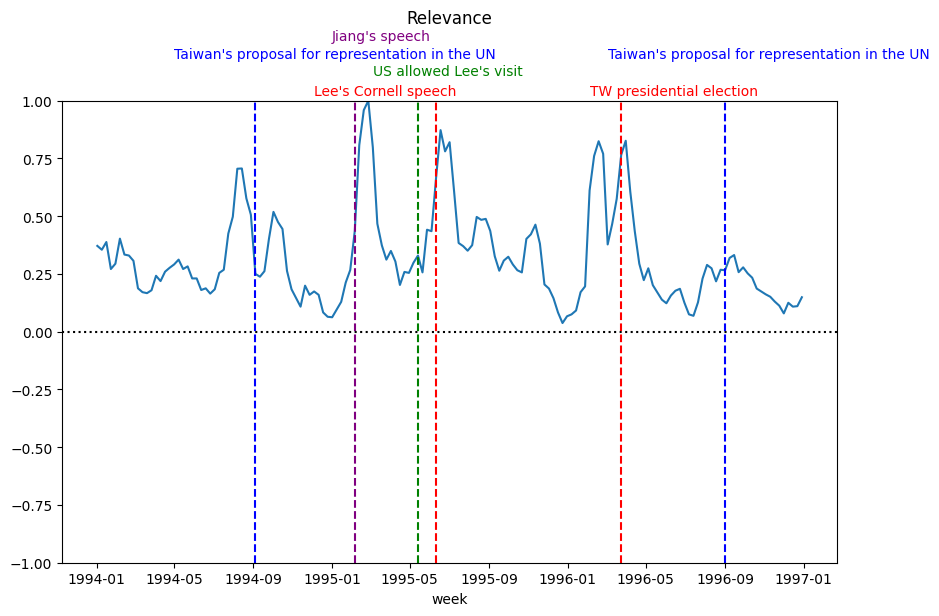

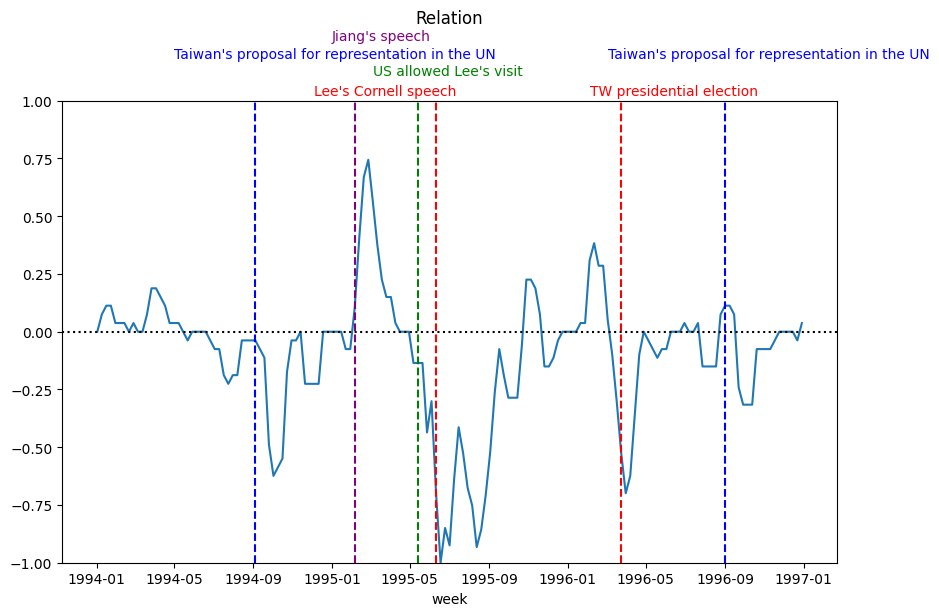

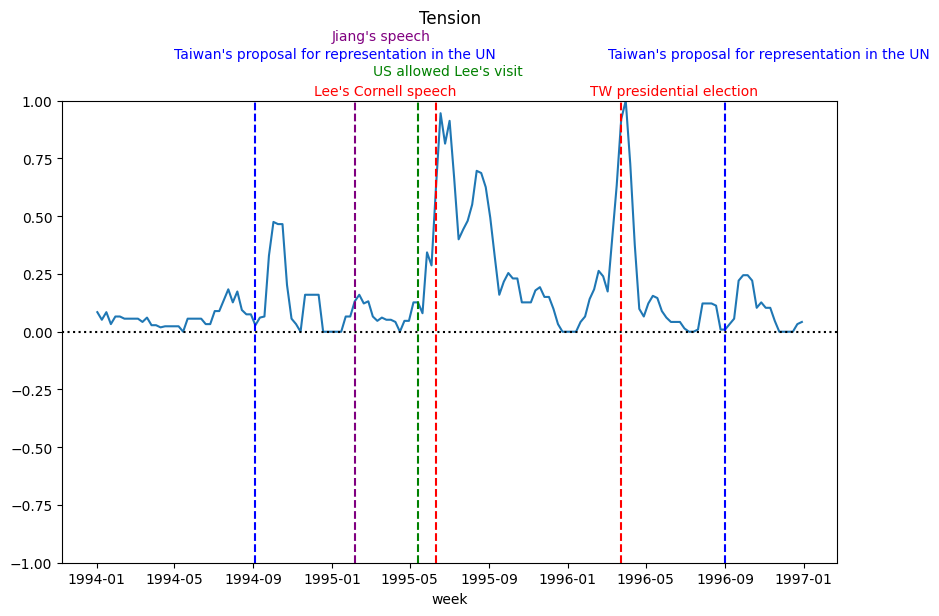

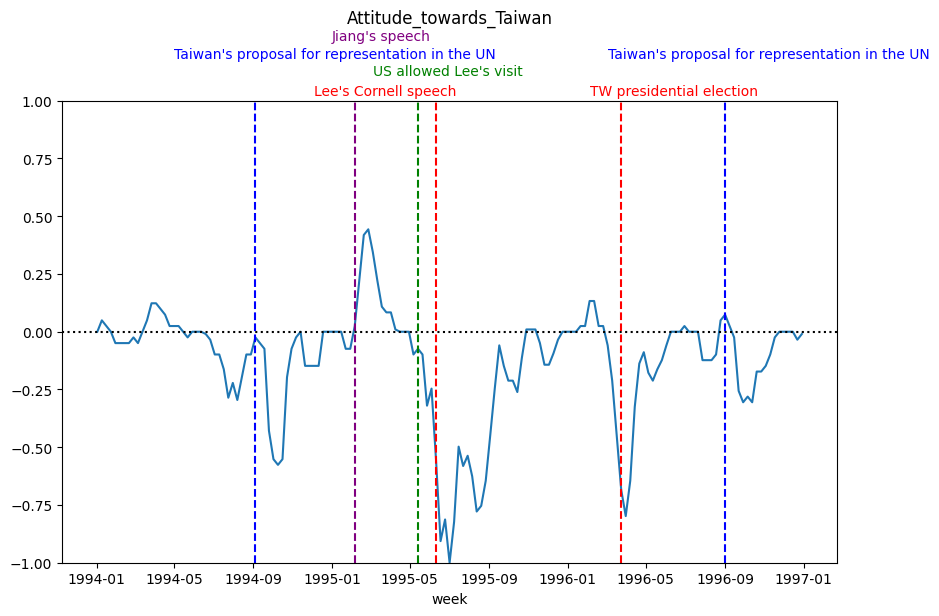

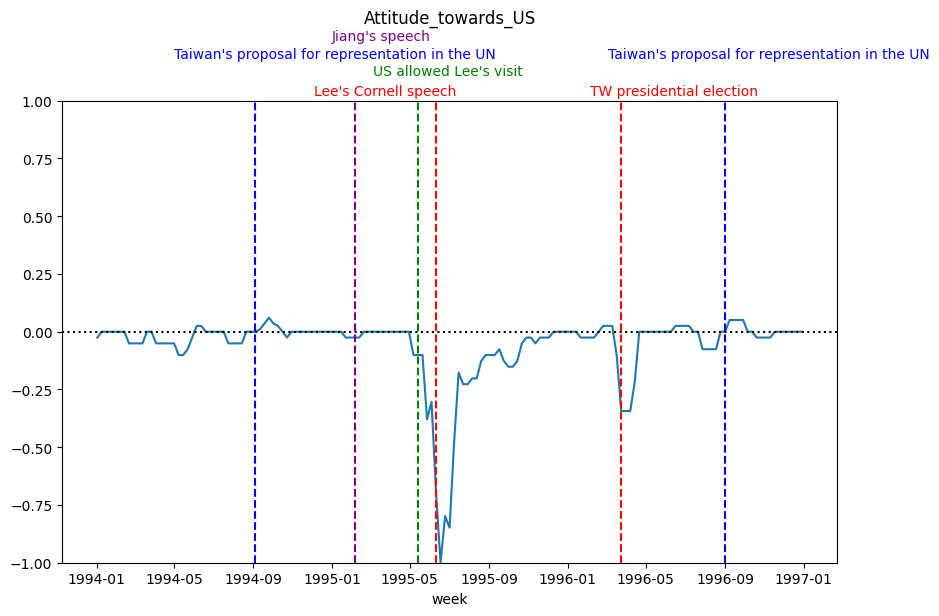

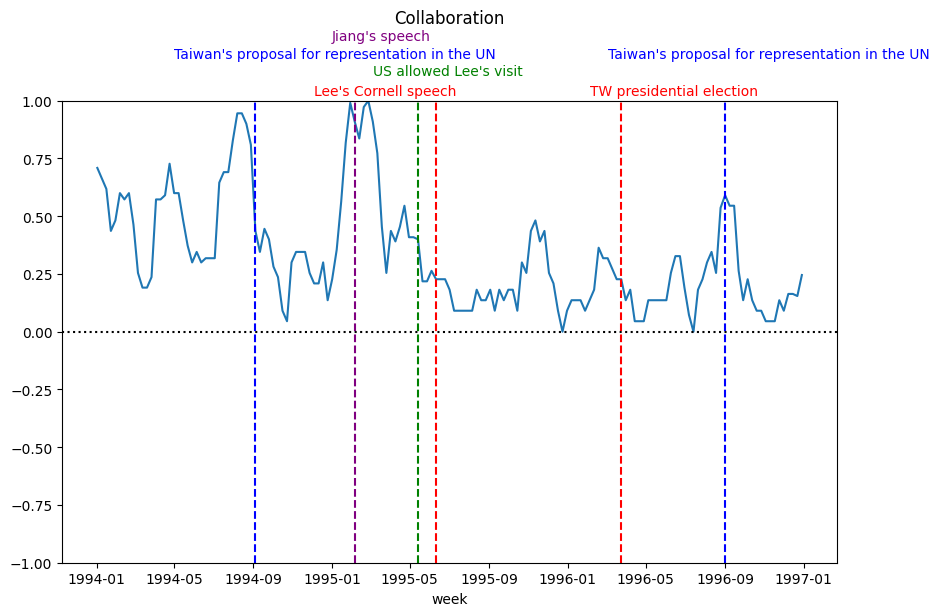

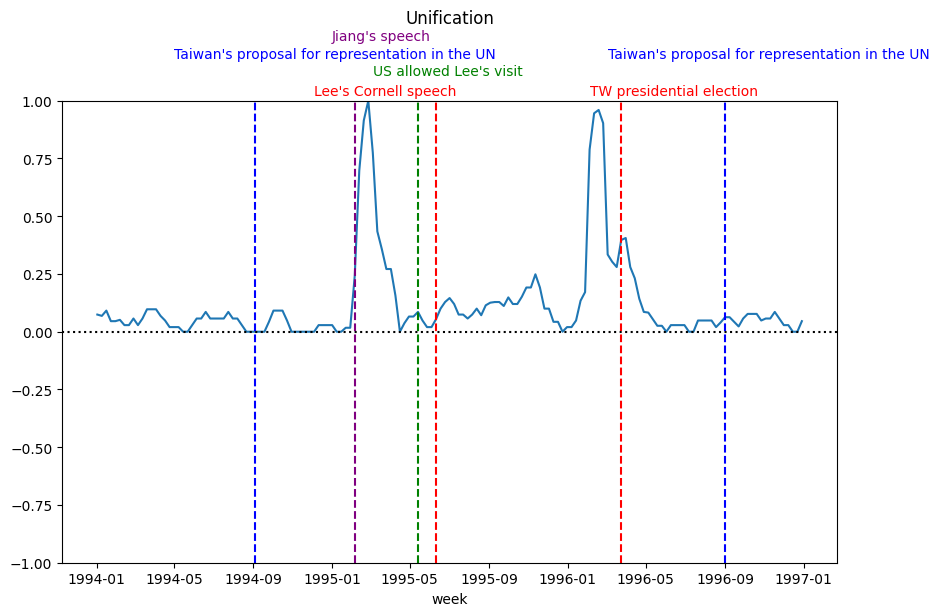

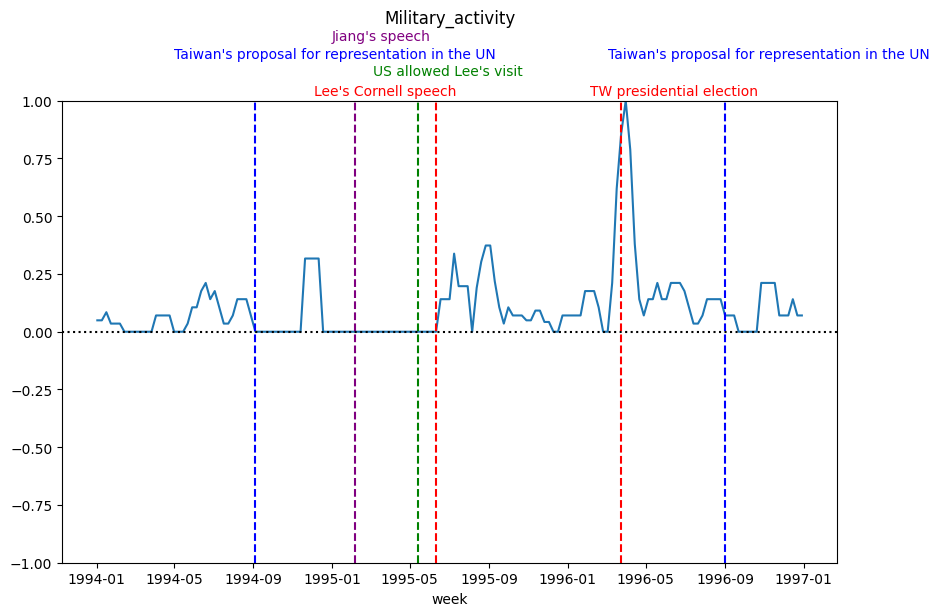

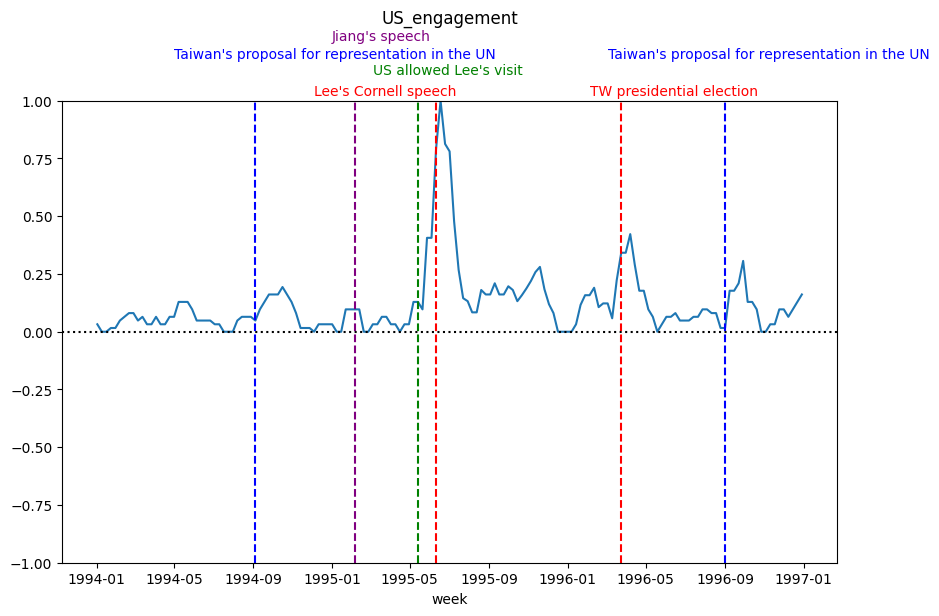

**************************************************
pelosi
**************************************************


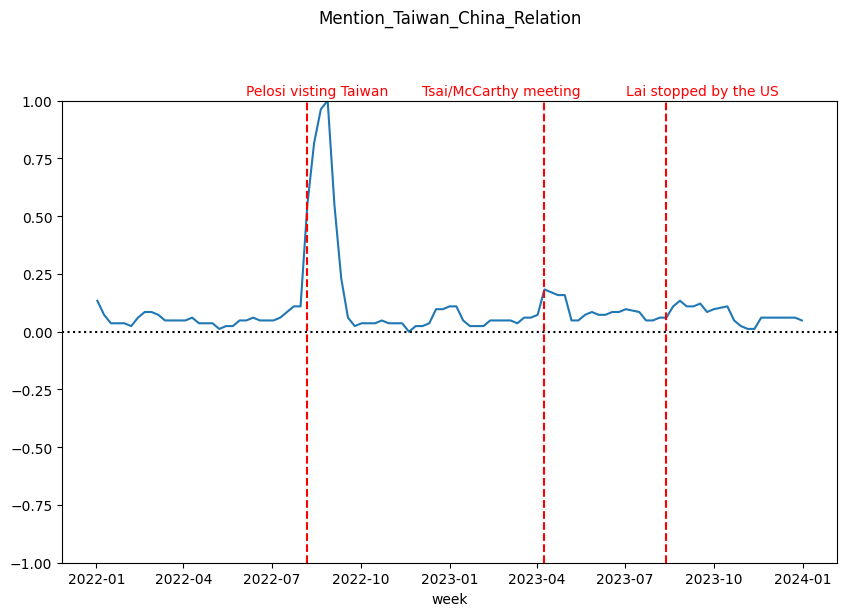

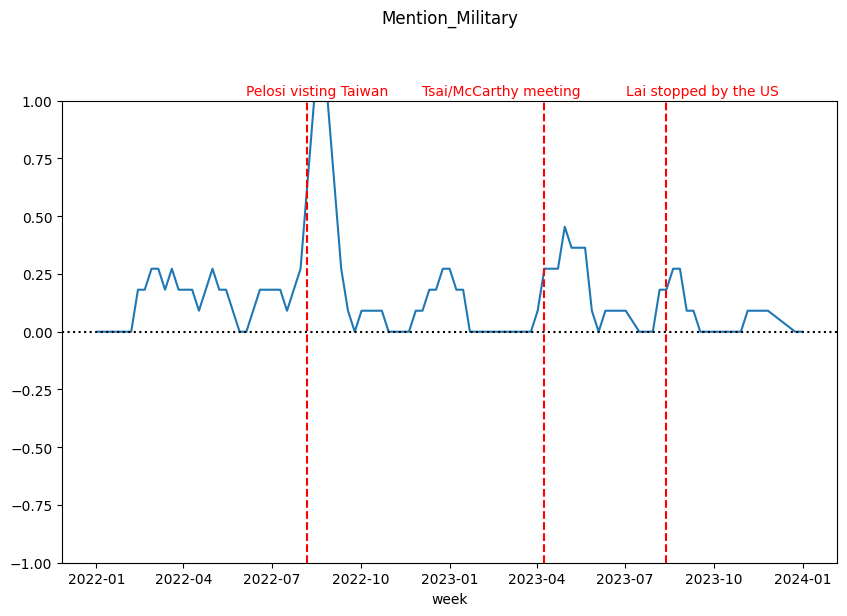

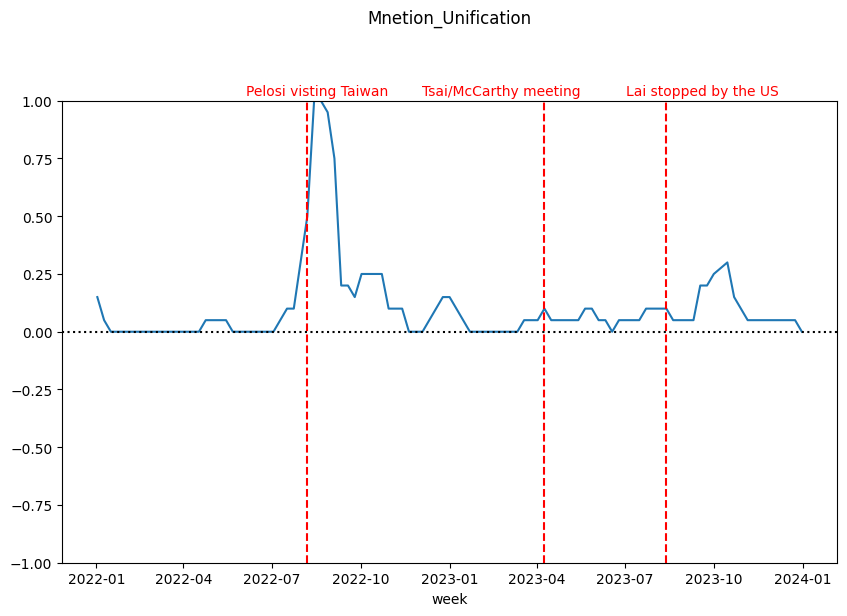

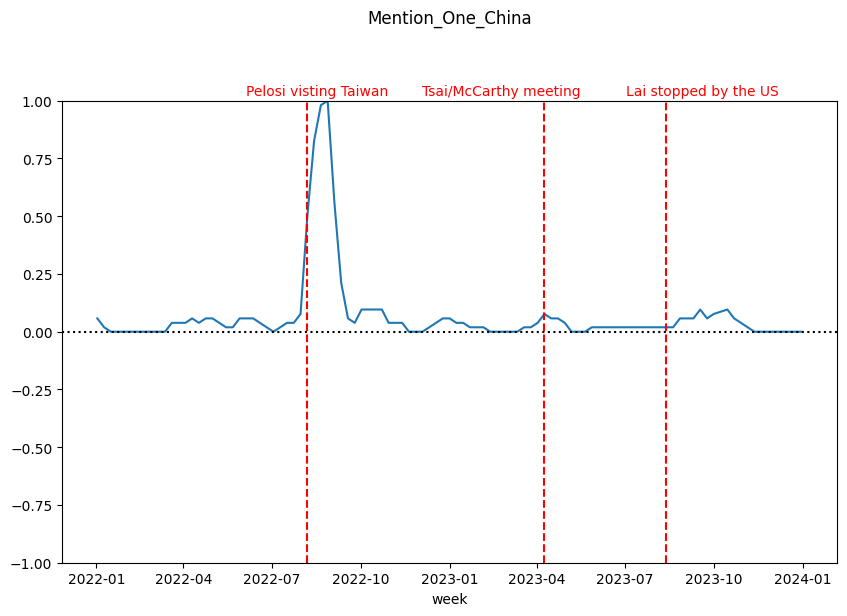

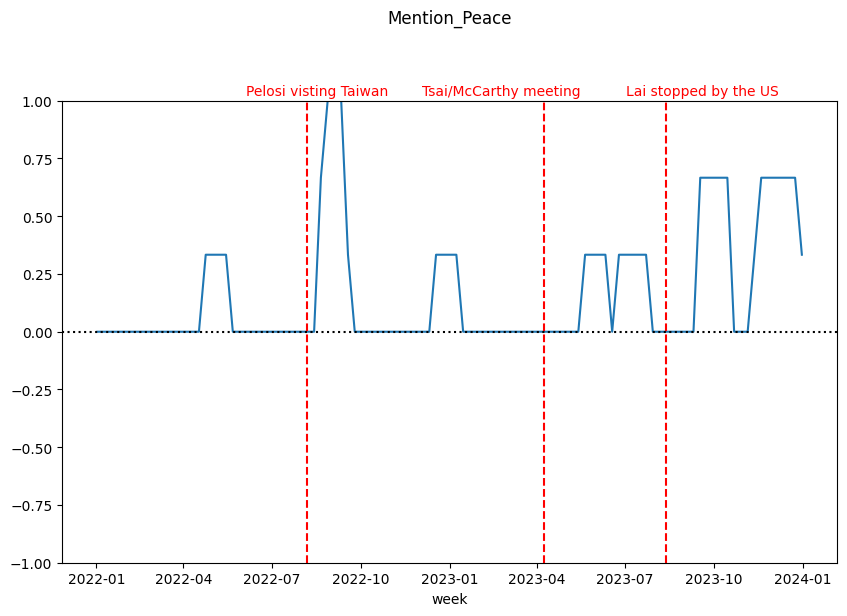

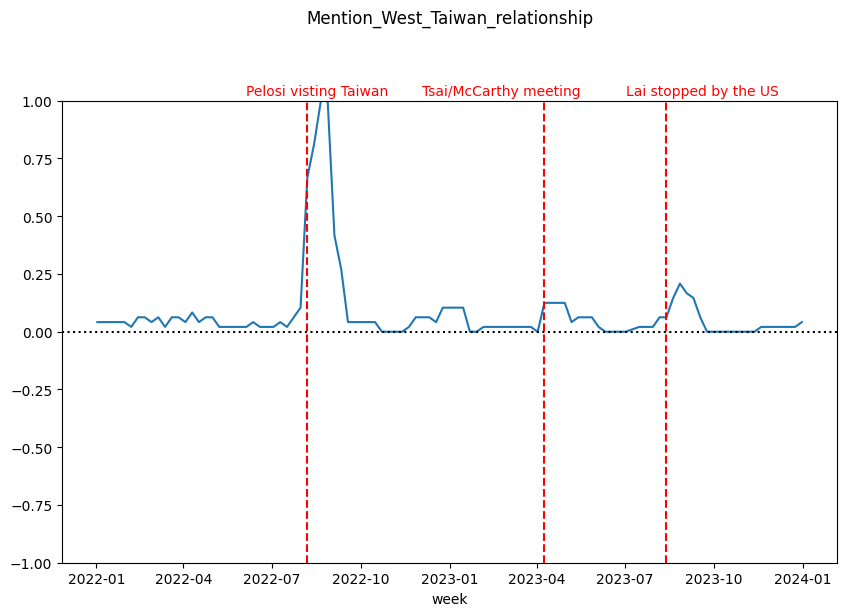

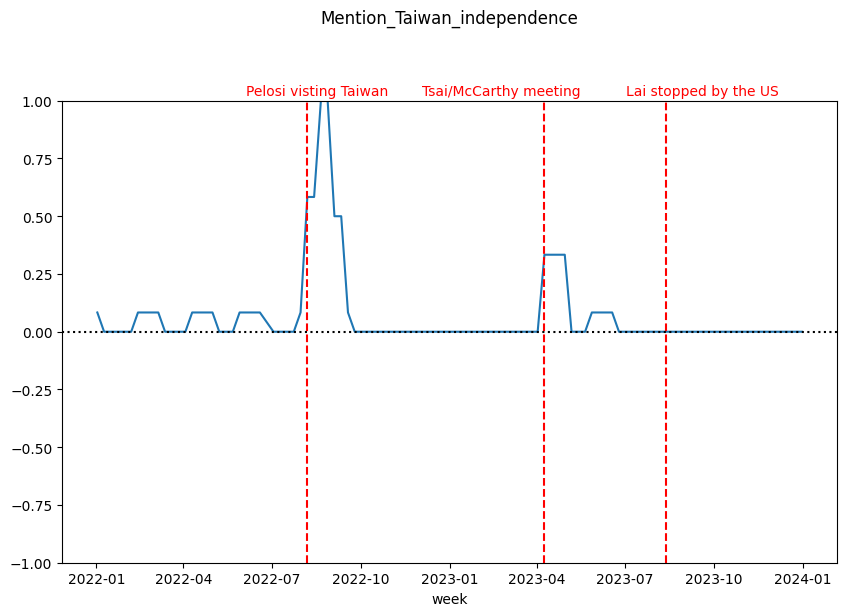

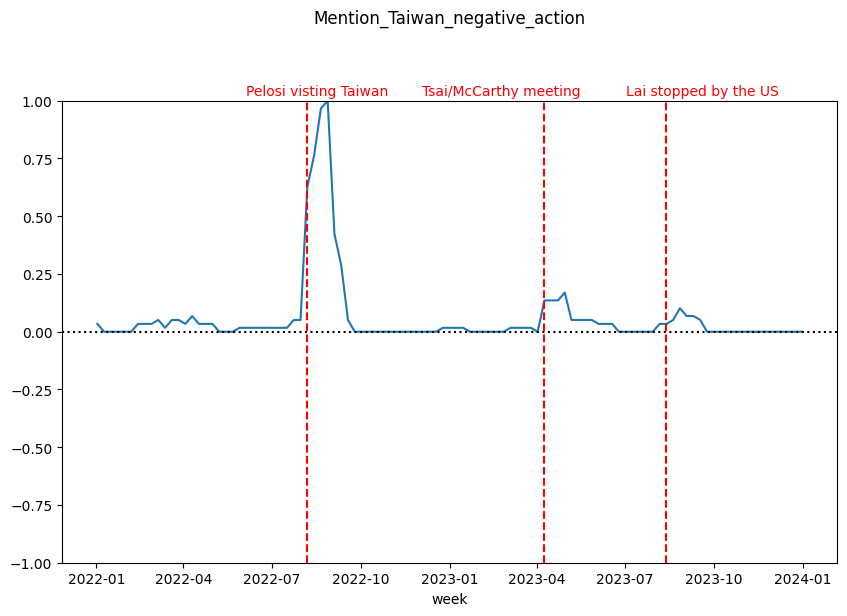

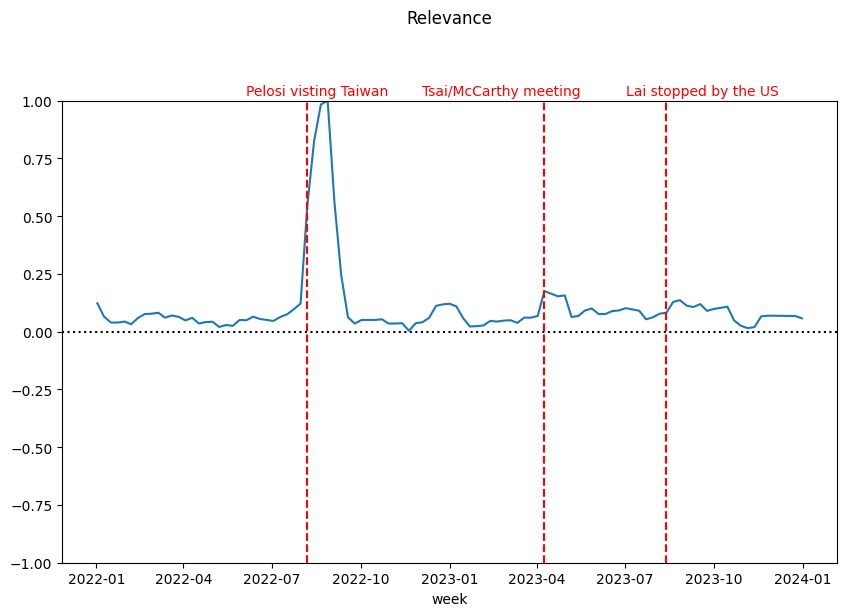

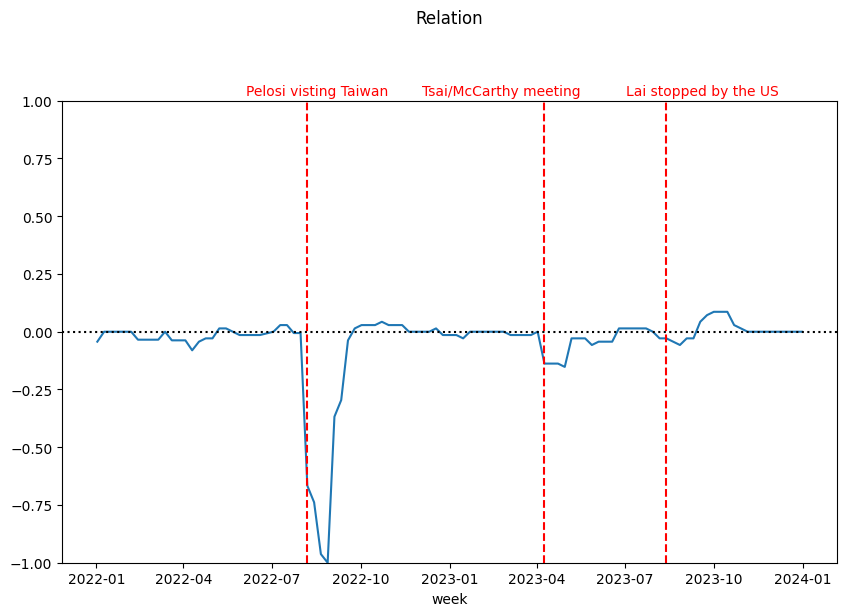

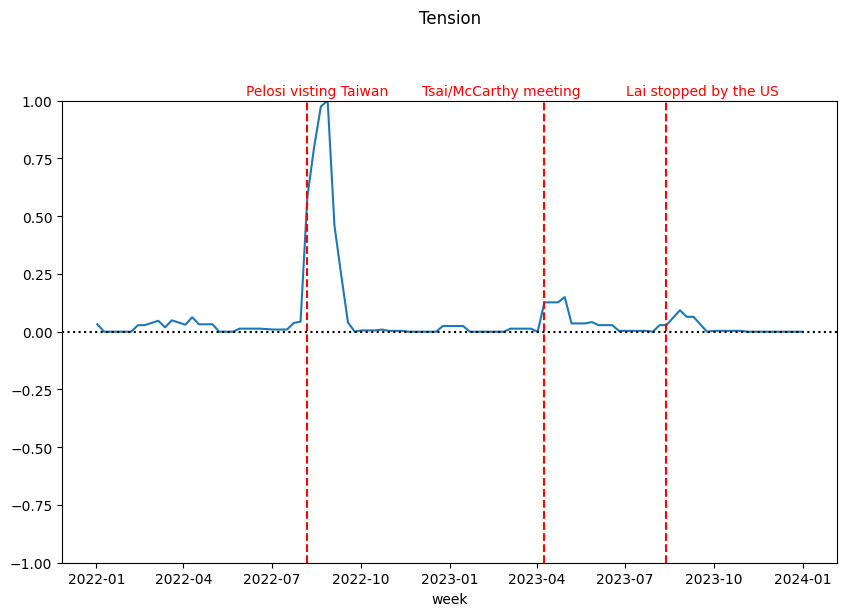

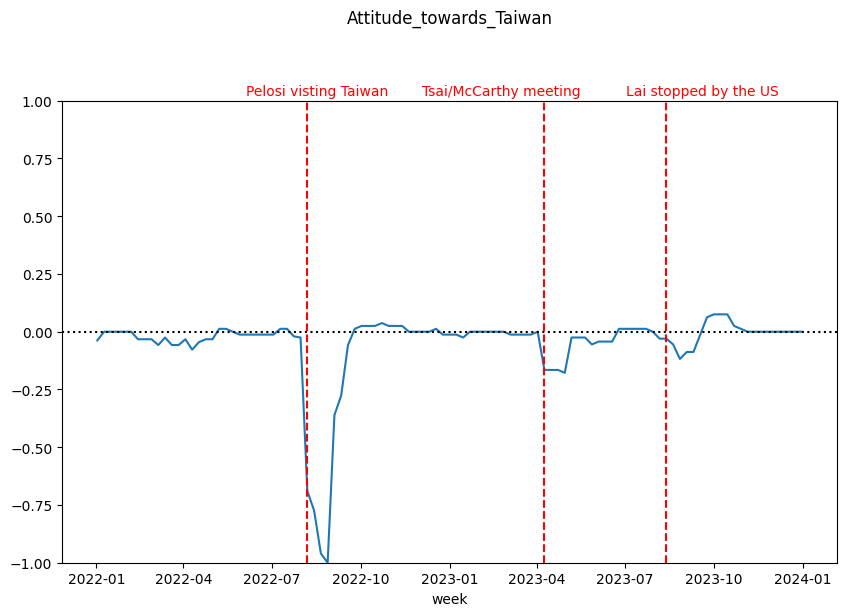

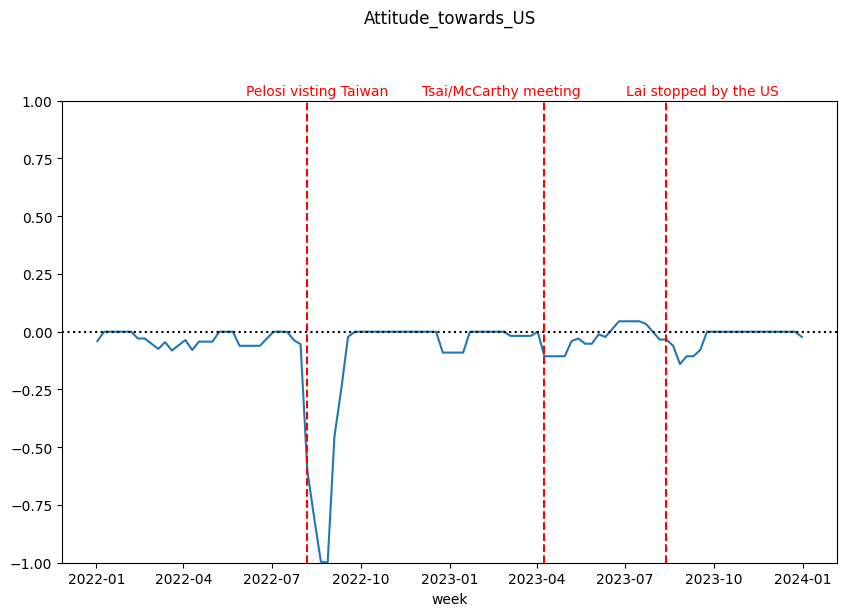

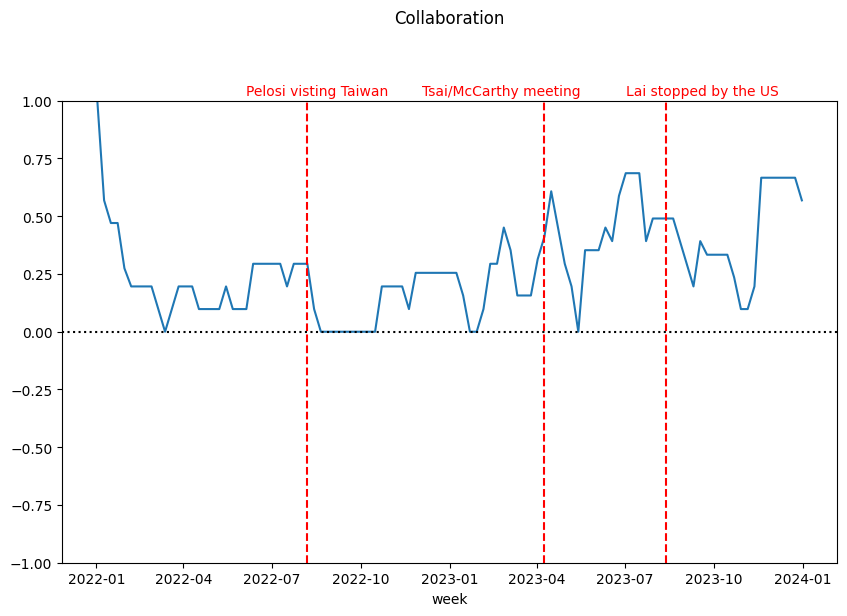

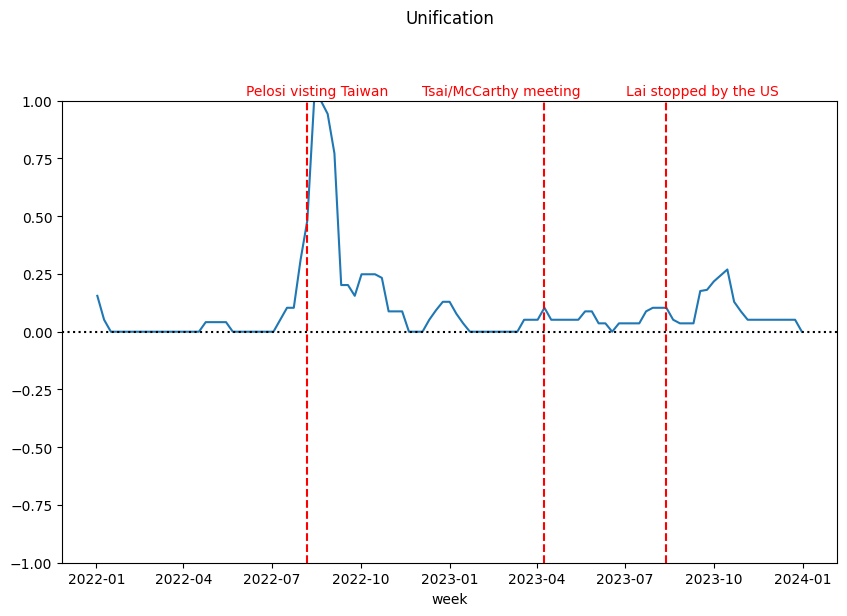

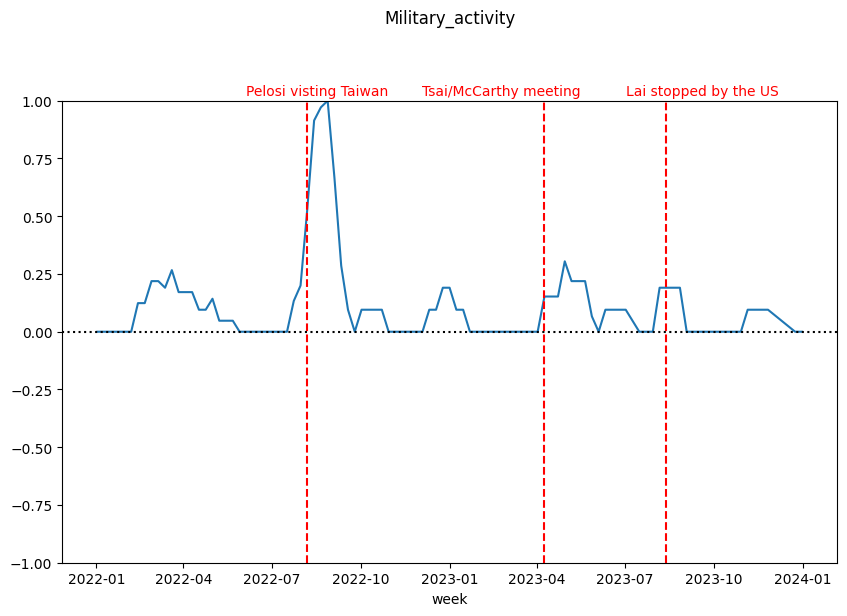

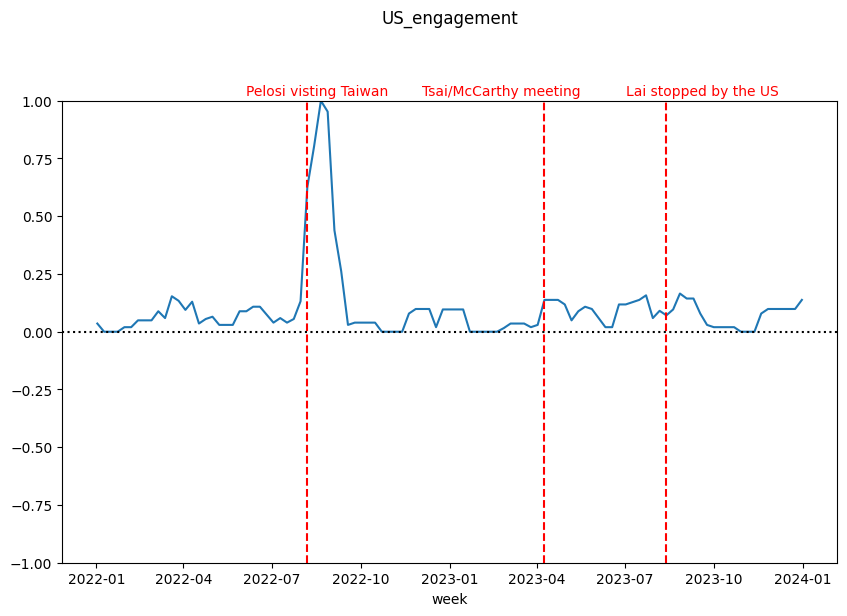

In [4]:
# All results
for event in ['96_crisis', 'pelosi']:

    print("*"*50)
    print(event)
    print("*"*50)
        
    for topic in df_results[event].columns:
        
        plt.figure(figsize=(10, 6))
        # plt.legend(prop={'size': 12})
        plt.ylim([-1, 1])
        
        val = df_results[event][topic]
        val = val / max(abs(val))
        val.plot()
        add_vlines[event]()
        plt.axhline(y=0, color='black', linestyle=':')
        plt.title(f"{topic}", x=0.5, y=1.15)
        plt.show()
        

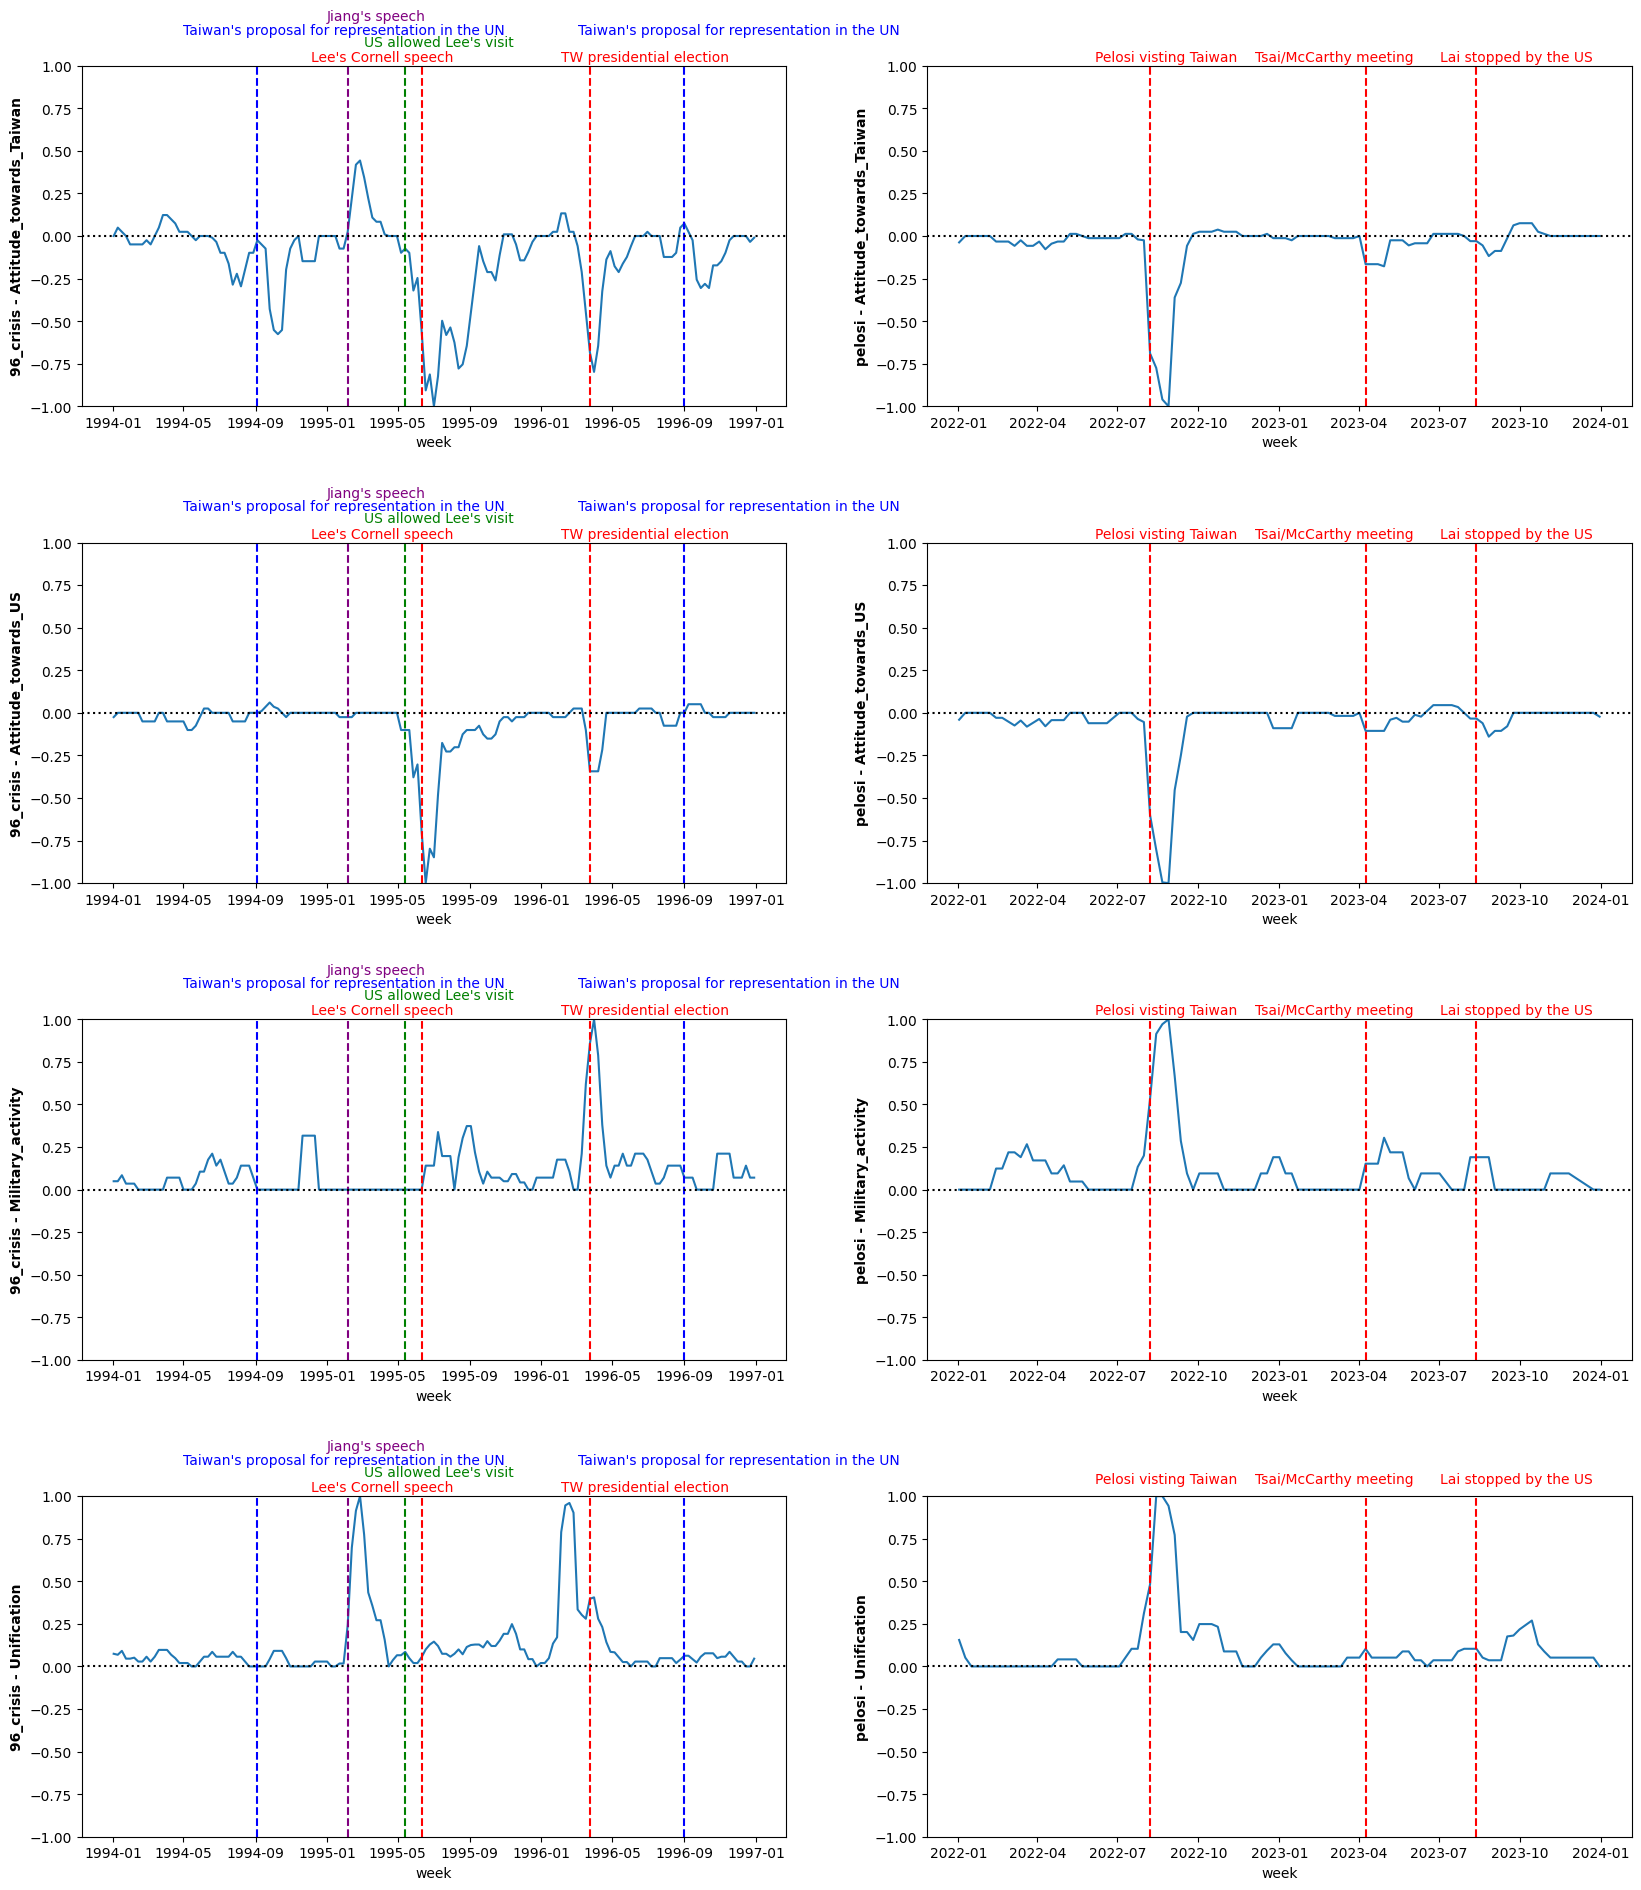

In [5]:
# Main features used in writing

fig, axes = plt.subplots(4, 2, figsize=(20, 23))
axes = axes.flatten()

for i, topic in enumerate(["Attitude_towards_Taiwan", "Attitude_towards_US", "Military_activity", "Unification"]):
    for j, event in enumerate(['96_crisis', 'pelosi']):
        ax = axes[i*2 + j]
        val = df_results[event][topic]
        val = val / max(abs(val))
        val.plot(ax=ax)
        add_vlines[event](ax)
        ax.axhline(y=0, color='black', linestyle=':')
        ax.set_ylim([-1, 1])
        #ax.set_title(f"{event} - {topic}")
        ax.set_ylabel(f"{event} - {topic}", fontweight='bold')
        ax.title.set_position([.5, 5])
        
plt.subplots_adjust(hspace=0.4, wspace=0.2)
#plt.tight_layout()
plt.show()
